c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      570 non-null    datetime64[ns]
 1   y       570 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.0 KB


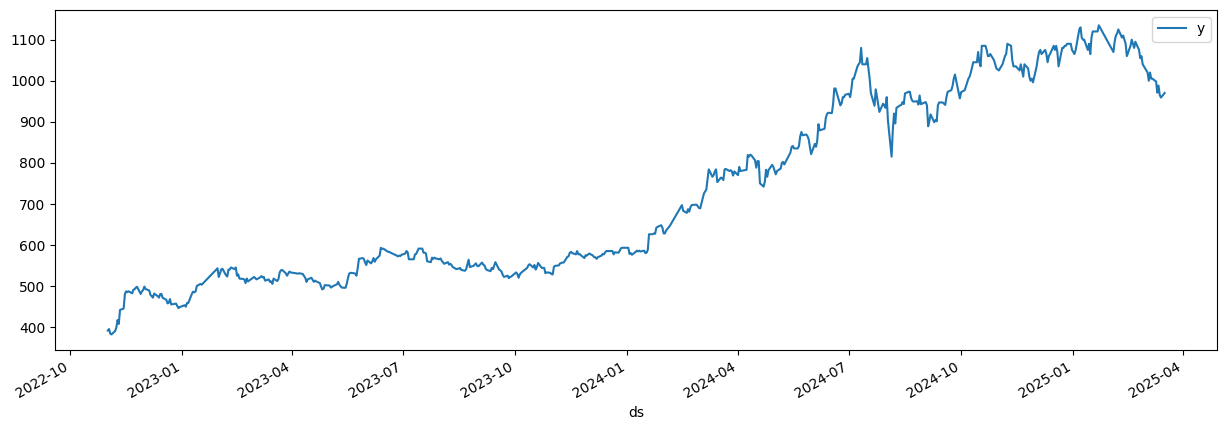

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level, set_random_seed
# set_log_level("ERROR")

df = pd.read_csv('data/stocks/2330_stock_data_0317.csv', parse_dates=['ds'])[['ds', 'y']]
plt = df.plot(x="ds", y="y", figsize=(15, 5))
df.info()

In [2]:
# Import the NeuralProphet class
from neuralprophet import NeuralProphet, set_log_level

# Disable logging messages unless there is an error
# set_log_level("ERROR")

# Create a NeuralProphet model with default parameters
m = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
)
m.set_plotting_backend("matplotlib")

df_train, df_val = m.split_df(df, valid_p=0.2)
print(f"validation: {df_val['ds'].iloc[0]} ~ {df_val['ds'].iloc[-1]}")
set_random_seed(0)
metrics = m.fit(df_train, validation_df=df_val)
metrics

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.14% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are disp

validation: 2024-09-20 00:00:00 ~ 2025-03-17 00:00:00
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (29) is too small than the required number                     for the learning rate finder (218). The results might not be optimal.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

Finding best initial lr: 100%|██████████| 218/218 [00:00<00:00, 278.22it/s]


Training: |          | 0/? [00:15<?, ?it/s, v_num=830, MAE_val=70.80, RMSE_val=86.50, Loss_val=0.037, RegLoss_val=0.000, train_loss=0.00164, reg_loss=0.000, MAE=14.10, RMSE=18.70, Loss=0.00162, RegLoss=0.000] 


,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,364.962769,445.089355,0.496700,0.0,0,0.336347,0.0,335.278748,411.122009,0.336418,0.0
1,303.712311,370.145905,0.394323,0.0,1,0.250011,0.0,269.395569,331.408173,0.252043,0.0
2,244.044373,298.322968,0.294958,0.0,2,0.169303,0.0,203.451019,249.475723,0.170919,0.0
3,182.156662,224.600998,0.193572,0.0,3,0.093065,0.0,136.754898,165.614914,0.091937,0.0
4,150.416168,182.403015,0.139335,0.0,4,0.037753,0.0,82.470039,101.629326,0.037693,0.0
...,...,...,...,...,...,...,...,...,...,...,...
145,70.814636,86.542046,0.037072,0.0,145,0.001635,0.0,14.105927,18.644691,0.001617,0.0
146,70.415901,86.260223,0.036824,0.0,146,0.001639,0.0,14.173201,18.903461,0.001632,0.0
147,71.053085,86.701439,0.037218,0.0,147,0.001636,0.0,14.336020,18.668167,0.001625,0.0
148,71.144524,86.812347,0.037311,0.0,148,0.001627,0.0,14.352962,18.854776,0.001622,0.0


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.14% of the data.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed i

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 498.67it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_forecast_matplotlib.py:84: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()



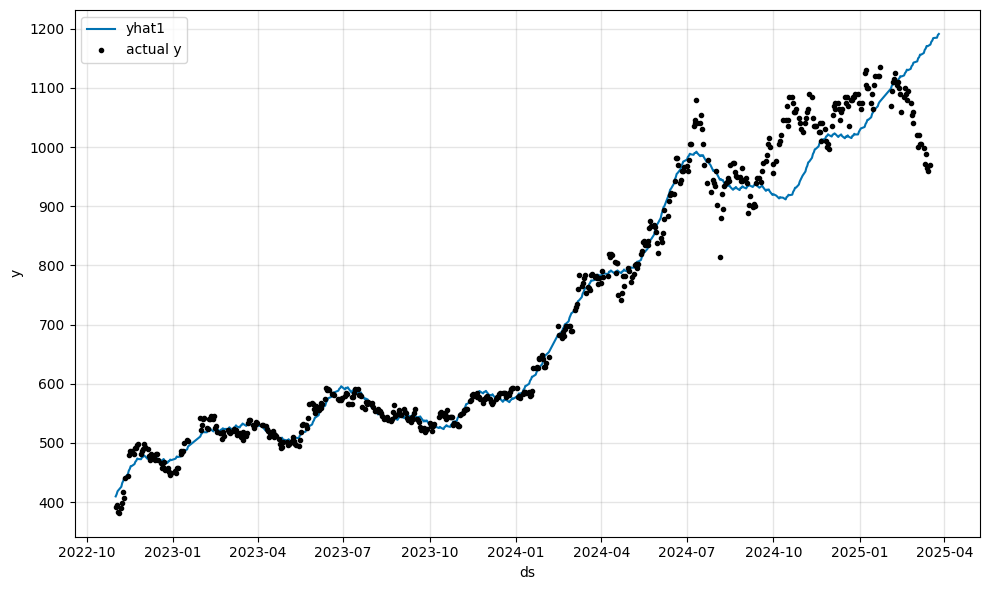

In [3]:
# Create a new dataframe reaching 365 into the future for our forecast, n_historic_predictions also shows historic data
df_future = m.make_future_dataframe(df, n_historic_predictions=True, periods=7)

# Predict the future
forecast = m.predict(df_future)

# Visualize the forecast
m.plot(forecast)

In [5]:
from src.model.utils import val_mape

print(f"MAPE={val_mape(df_val, forecast) * 100:.2f}%")

MAPE=6.80%


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.
WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_model_parameters_matplotlib.py:561: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y["ds"].dt.to_pydatetime(),

WARNING - (py.warnings._showwarnmsg) - c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\neuralprophet\plot_model_parameters_matplotlib.py:636: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  days_i = pd.date_range(start="2017-01-01", periods=week_days * 24, freq="H") + p

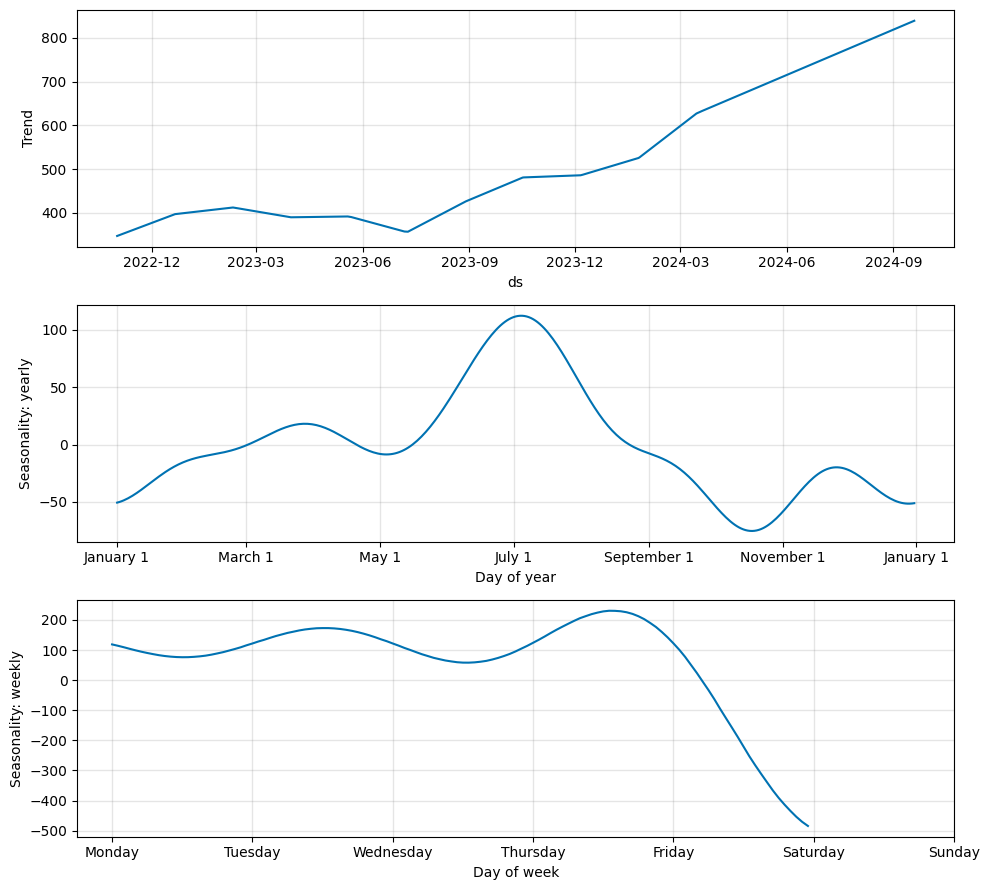

In [6]:
m.plot_parameters(components=["trend", "seasonality"])

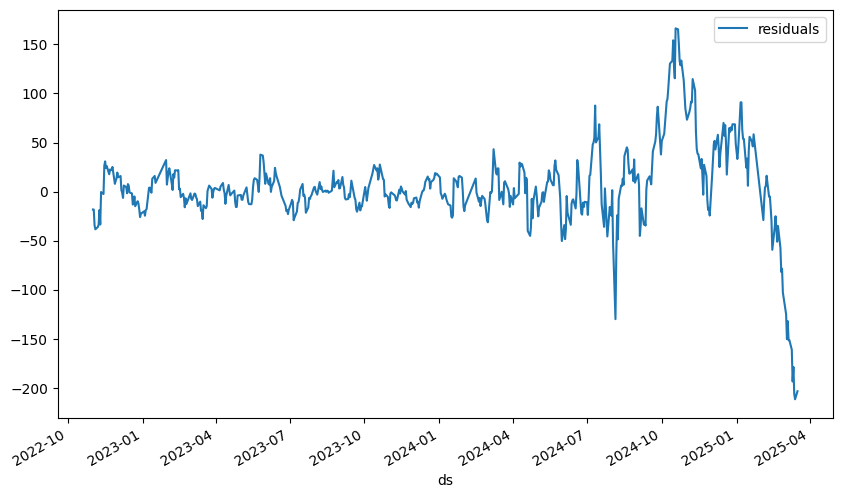

In [7]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

In [8]:
df_residuals_train = df_residuals.dropna()[df_residuals['ds'].dropna().isin(df_train['ds'])]
df_residuals_train

,ds,residuals
0,2022-11-01,-18.166595
1,2022-11-02,-18.219604
2,2022-11-03,-34.377014
3,2022-11-04,-38.328857
4,2022-11-07,-35.989349
...,...,...
451,2024-09-12,2.195984
452,2024-09-13,11.391846
453,2024-09-16,15.637085
454,2024-09-18,7.472717


In [9]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

p = plot_acf(df_residuals_train['residuals'], lags=50)

ModuleNotFoundError: No module named 'statsmodels'